In [3]:
import pandas as pd
import numpy as np

df_train=pd.read_csv('C:/Users/panka/Desktop/Intent_classification/airlines_intent_dataset/atis_intents_train.csv')
df_test=pd.read_csv('C:/Users/panka/Desktop/Intent_classification/airlines_intent_dataset/atis_intents_test.csv')

In [4]:
df_train.head()

,atis_flight,i want to fly from boston at 838 am and arrive in denver at 1110 in the morning
0,atis_flight,what flights are available from pittsburgh to...
1,atis_flight_time,what is the arrival time in san francisco for...
2,atis_airfare,cheapest airfare from tacoma to orlando
3,atis_airfare,round trip fares from pittsburgh to philadelp...
4,atis_flight,i need a flight tomorrow from columbus to min...


Since there is no columns name , so giving column name to both the columns

In [5]:
df_train.columns=['label', 'query']

In [6]:
df_train.head()

,label,query
0,atis_flight,what flights are available from pittsburgh to...
1,atis_flight_time,what is the arrival time in san francisco for...
2,atis_airfare,cheapest airfare from tacoma to orlando
3,atis_airfare,round trip fares from pittsburgh to philadelp...
4,atis_flight,i need a flight tomorrow from columbus to min...


In [7]:
df_train['label'][0:50]

0             atis_flight
1        atis_flight_time
2            atis_airfare
3            atis_airfare
4             atis_flight
5           atis_aircraft
6             atis_flight
7             atis_flight
8     atis_ground_service
9             atis_flight
10            atis_flight
11            atis_flight
12            atis_flight
13           atis_airfare
14    atis_ground_service
15            atis_flight
16            atis_flight
17            atis_flight
18            atis_flight
19            atis_flight
20            atis_flight
21          atis_aircraft
22           atis_airfare
23            atis_flight
24           atis_airline
25            atis_flight
26    atis_ground_service
27            atis_flight
28           atis_airfare
29            atis_flight
30            atis_flight
31            atis_flight
32            atis_flight
33           atis_airfare
34           atis_airline
35            atis_flight
36            atis_flight
37            atis_flight
38          

In [8]:
len(df_train['label'])

4833

In [9]:
df_train['label'].unique()

array(['atis_flight', 'atis_flight_time', 'atis_airfare', 'atis_aircraft',
       'atis_ground_service', 'atis_airline', 'atis_abbreviation',
       'atis_quantity'], dtype=object)

*Converting categorical labels (such as class labels in a classification problem) that need to be converted into numerical values*.

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder() # creating instance of the label encoder class

df_train['label']=encoder.fit_transform(df_train['label'])

In [11]:
df_train.head()

,label,query
0,4,what flights are available from pittsburgh to...
1,5,what is the arrival time in san francisco for...
2,2,cheapest airfare from tacoma to orlando
3,2,round trip fares from pittsburgh to philadelp...
4,4,i need a flight tomorrow from columbus to min...


In [12]:
# from sklearn.preprocessing import LabelEncoder


# df_train['label']=LabelEncoder().fit_transform(df_train['label'])

In [20]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical # one hot encoding
from keras.utils import pad_sequences  # to ensure that all sequences have the same length.

Max_sequence_length=10 # maximum length of sequence we wanna generated
max_num_words=5000 #  maximum number of unique words in the vocabulary
tokenizer=Tokenizer(num_words=max_num_words) # creating the Tokenizer object and setting the max. word limit to 5000
y=tokenizer.fit_on_texts(df_train['query']) # analyze the text and build the vocabulary based on the word frequency.
# sequences=tokenizer.texts_to_matrix(df_train['query']) # takes query column of the data and convert each text into a numerical matrix.
# use one hot encoding scheme where each word binary vector(1, presence of the word) and 0 absence of the word

sequences=tokenizer.texts_to_sequences(df_train['query'])


In [22]:
sequences

[[7, 3, 26, 57, 2, 19, 1, 21, 5, 75, 35],
 [7, 22, 4, 394, 181, 15, 11, 14, 38, 4, 511, 84, 8, 33, 32],
 [51, 275, 2, 179, 1, 124],
 [55, 49, 67, 2, 19, 1, 24, 315, 226, 169],
 [18, 52, 13, 8, 133, 2, 218, 1, 175],
 [7, 215, 31, 134, 22, 207, 5, 13, 8, 2, 135, 1, 20],
 [10, 6, 4, 3, 2, 19, 1, 137, 138, 5, 75],
 [23, 3, 2, 9, 1, 32],
 [7, 215, 31, 47, 50, 22, 57, 15, 12],
 [10, 6, 4, 3, 2, 20, 1, 11, 14],
 [10, 6, 4, 3, 2, 11, 111, 1, 98, 166, 68, 31, 121],
 [7, 22, 4, 51, 8, 2, 9, 1, 297],
 [23, 3, 1, 21, 45, 145, 36],
 [10, 6, 4, 41, 53, 67, 2, 9, 1, 12],
 [10, 6, 4, 47, 50, 15, 12],
 [23, 3, 2, 12, 1, 19, 33, 45, 145, 36, 16, 60, 167, 36],
 [18, 52, 83, 5, 3, 38, 81, 33, 21, 38, 20, 20, 1, 9, 16, 9, 1, 21],
 [34, 66, 6, 4, 3, 2, 9, 1, 19, 5, 75, 31, 113, 260],
 [18, 37, 25, 1, 39, 2, 12, 1, 19, 5, 80, 28],
 [10, 6, 4, 3, 2, 11, 111, 1, 98],
 [34, 27, 23, 41, 53, 3, 5, 80, 2, 12, 1, 21],
 [7, 458, 31, 360, 26, 207, 166, 64, 28],
 [46, 25, 1, 61, 344, 83, 5, 13, 157, 2, 12, 1, 19, 16, 

In [26]:
tokenizer.word_counts

OrderedDict([('what', 1212),
             ('flights', 2406),
             ('are', 438),
             ('available', 188),
             ('from', 3654),
             ('pittsburgh', 671),
             ('to', 4243),
             ('baltimore', 613),
             ('on', 1472),
             ('thursday', 142),
             ('morning', 286),
             ('is', 613),
             ('the', 2005),
             ('arrival', 5),
             ('time', 40),
             ('in', 826),
             ('san', 988),
             ('francisco', 852),
             ('for', 269),
             ('755', 2),
             ('am', 126),
             ('flight', 1148),
             ('leaving', 313),
             ('washington', 334),
             ('cheapest', 205),
             ('airfare', 16),
             ('tacoma', 41),
             ('orlando', 81),
             ('round', 197),
             ('trip', 212),
             ('fares', 155),
             ('philadelphia', 579),
             ('under', 11),
             ('1000', 26)

In [25]:
word_index=tokenizer.word_index
print(f'found unique tokens: {len(word_index)}')

found unique tokens: 871


In [29]:
data=pad_sequences(sequences, maxlen=Max_sequence_length)
print(data)
print('\n')
print(data.shape)

[[  3  26  57 ...   5  75  35]
 [ 15  11  14 ...   8  33  32]
 [  0   0   0 ... 179   1 124]
 ...
 [  0   0  63 ... 229  31  12]
 [  2   9   1 ... 109  15  12]
 [ 22  43  13 ...   1  11  14]]


(4833, 10)


In [32]:
labels=to_categorical(df_train['label'])
print(labels)
print("*****************")
print(labels.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
*****************
(4833, 8)


In [33]:
x_train=data
y_train=labels

In [34]:
x_train.shape, y_train.shape

((4833, 10), (4833, 8))

In [36]:
# in the text we can use 1D convolutional layer
from keras.layers import Dense, Input, MaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding,Flatten
from keras.models import Model
from keras.models import Sequential
from keras.layers import LSTM

atis_rnnmodel=Sequential() # Sequential model is a linear stack of layers that allow us to build a neural network layer by layer
atis_rnnmodel.add(Embedding(max_num_words, 128)) # takes input as max number of words in our vocabulary,128-> dimensionality of the dense embeddings(each word will be rp as  128 dimensional vector)
# it takes integar encoded word as input and convert them into dense vectors of size 128, output size-> (input_sequence_length, 128)
atis_rnnmodel.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
# params-< number of lstm layers,dropout rate for the dropout regularization applied to the inputs of the LSTM layer
# A dropout rate of 0.2 means 20% of the input units will be dropped during training.
# Recurrent_dropout=0.2: This parameter sets the dropout rate for recurrent connections in the LSTM.
# output by lstm-> (batch_size, 128)
atis_rnnmodel.add(Dense((8), activation='softmax'))


In [39]:
# Create a Sequential model
embeddings_model = Sequential()

# Add only the Embedding layer to the model
embeddings_model.add(Embedding(max_num_words, 128, input_length=Max_sequence_length))

# Summary of the model to see the output shape
embeddings_model.summary()
input_data=x_train
prediction=embeddings_model.predict([input_data])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 10, 128)           640000    
                                                                 
Total params: 640,000
Trainable params: 640,000
Non-trainable params: 0
_________________________________________________________________


152/152 [==============================] - 0s 981us/step


In [41]:
prediction, prediction.shape,  # output shape-< [input shape, embedding dimension for every word[128 here]]

(array([[[ 0.04129541,  0.02129595, -0.02859287, ...,  0.00183133,
          -0.03498625, -0.04148374],
         [-0.03625851,  0.01767736,  0.03812169, ..., -0.04079535,
           0.02033216,  0.01513046],
         [-0.04048896, -0.01755654, -0.04549854, ...,  0.00015596,
          -0.02659097,  0.03258732],
         ...,
         [-0.04746025,  0.00242934, -0.01534784, ..., -0.03865639,
           0.00573704,  0.00238614],
         [-0.03812133, -0.01514385, -0.03925866, ..., -0.04666283,
          -0.02646823, -0.04286797],
         [ 0.01434786,  0.00866889, -0.00191259, ...,  0.02817272,
          -0.04731579, -0.03378004]],
 
        [[-0.04086105, -0.02340775,  0.04648039, ...,  0.0036964 ,
          -0.00955017, -0.02985426],
         [-0.02583962, -0.0070361 ,  0.01231902, ..., -0.04864952,
           0.0250162 ,  0.01929418],
         [ 0.01855082, -0.01355559, -0.04608421, ..., -0.02827338,
          -0.02725886, -0.01345285],
         ...,
         [-0.0057414 ,  0.0168799

In [47]:
# print(prediction[0].shape) # (10,128) for 1st word of the data
embeddings_lstm_model=Sequential()
embeddings_lstm_model.add(Embedding(max_num_words, 128))
embeddings_lstm_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
embeddings_lstm_model.summary()
input_data=x_train
prediction_lstm=embeddings_lstm_model.predict(x_train)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 128)         640000    
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
Total params: 771,584
Trainable params: 771,584
Non-trainable params: 0
_________________________________________________________________
152/152 [==============================] - 1s 3ms/step


In [49]:
prediction_lstm, prediction_lstm.shape # output shape will be generally (batch_size,128) # since we don't have any batch size, so out no of samples in the data will be the batch size
# output shape(4833, 128)

(array([[-3.71758011e-03,  5.27177472e-03, -1.41248666e-02, ...,
         -5.45517774e-03,  4.46637580e-03,  6.50837366e-03],
        [-6.72406983e-03, -5.77904331e-03,  5.09408303e-03, ...,
          1.48995640e-02,  4.96290813e-05, -5.27574541e-03],
        [-2.67696427e-03,  1.37987838e-03, -1.30516216e-02, ...,
         -7.93340802e-03,  4.07683617e-03,  1.99464057e-03],
        ...,
        [-1.87089981e-03,  1.25548653e-02, -1.38783418e-02, ...,
          1.03228563e-03, -6.81901351e-04, -3.37956497e-03],
        [ 1.16894385e-02,  7.40976213e-03, -1.16500733e-02, ...,
          1.44636782e-03,  7.79192569e-03,  3.36219091e-03],
        [ 5.89462882e-03,  1.47588123e-02, -9.63513087e-03, ...,
          1.00894098e-03,  5.39966859e-03, -1.20979296e-02]], dtype=float32),
 (4833, 128))

In [50]:
atis_rnnmodel.compile(loss='categorical_crossentropy',
 optimizer='adam',
 metrics= ['accuracy'])

history=atis_rnnmodel.fit(x_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
31/31 [==============================] - 6s 42ms/step - loss: 1.3437 - accuracy: 0.7338 - val_loss: 0.8417 - val_accuracy: 0.7497
Epoch 2/10
31/31 [==============================] - 1s 32ms/step - loss: 0.7374 - accuracy: 0.7747 - val_loss: 0.6894 - val_accuracy: 0.7901
Epoch 3/10
31/31 [==============================] - 1s 31ms/step - loss: 0.6288 - accuracy: 0.8187 - val_loss: 0.6008 - val_accuracy: 0.8180
Epoch 4/10
31/31 [==============================] - 1s 31ms/step - loss: 0.5186 - accuracy: 0.8197 - val_loss: 0.4771 - val_accuracy: 0.8542
Epoch 5/10
31/31 [==============================] - 1s 30ms/step - loss: 0.3998 - accuracy: 0.8805 - val_loss: 0.3598 - val_accuracy: 0.9059
Epoch 6/10
31/31 [==============================] - 1s 32ms/step - loss: 0.3181 - accuracy: 0.9069 - val_loss: 0.3035 - val_accuracy: 0.9131
Epoch 7/10
31/31 [==============================] - 1s 37ms/step - loss: 0.2631 - accuracy: 0.9227 - val_loss: 0.2834 - val_accuracy: 0.9214
Epoch 8/10
31

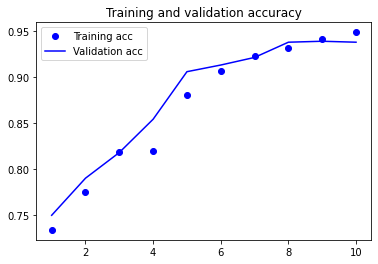

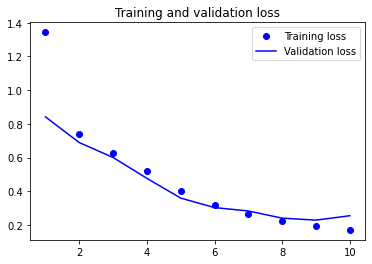

In [51]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [55]:
Xnew=["fare of flights  from columbus to chennai"]
sequences_new=tokenizer.texts_to_sequences(Xnew)
data=pad_sequences(sequences_new, maxlen=Max_sequence_length)
Y_prob=atis_rnnmodel.predict(data)
Y_max=Y_prob.argmax(axis=1)
Y_max_data=Y_prob.max(axis=1) # tells about the exact probability

print(Y_max)
print('*****************')
print(Y_max_data)

1/1 [==============================] - 0s 33ms/step
[2]
*****************
[0.9662573]


In [56]:
atis_rnnmodel.save("intent classification.h5")